<a href="https://colab.research.google.com/github/yoonsongg/Project/blob/main/try6_seoul_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터출처 : https://data.si.re.kr/node/65072

In [ ]:
url = '/content/drive/MyDrive/AI_Bootcamp/Section2_Project_data/try6/서울서베이 도시정책지표조사 정보(2020년)/6. 2020 서울서베이 가구원(원시자료와 부호화 지침서).xlsx'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel(url, sheet_name = 0)
#df_codebook = pd.read_excel(url, sheet_name = 1)

In [ ]:
#duplicate df
df_visual = df

In [ ]:
df.shape
df.head(10)
df.describe()

,date,ID,GU,NUM_1,FAM15,HOUSE,LIFE,SQ1_1,SQ1_2,SQ1_3,SQ1_4,SQ1_5,SQ1_6,SQ1_7,SQ1_8A,AQ1A1,AQ1A2,AQ1A3,AQ1A4,AQ2A1,AQ2A2,AQ2A3,AQ2A4,AQ2A5,AQ3,AQ4,AQ5A1,AQ5A2,AQ5A3,AQ5A4,AQ6A1,AQ6A2,AQ6A3,AQ6B1,AQ6B2,AQ6B3,AQ7A1,AQ7A2,AQ7A3,AQ7A4,...,AQ28B4,AQ28B5,AQ28C1,AQ28C2,AQ28C3,AQ28C4,AQ28C5,AQ29A1,AQ29A2,AQ29A3,AQ29A4,AQ30A1,AQ30A2,AQ30A3,AQ30A4,AQ30A5,AQ31A1,AQ31A2,AQ31A3,AQ31A4,AQ31A5,APQ1A5,ADQ1,ADQ1A,ADQ2A_1,ADQ2A_2,ADQ2B_1,ADQ2B_2,ADQ3,ADQ3_1,ADQ3_1_1A,ADQ3_1_1B,ADQ3_2A1,ADQ3_2A2,ADQ3_3A1,ADQ3_3A2,ADQ3_4,ADQ3_5,wtb1,wtb2
count,40085.0,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.0,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.00000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,24993.000000,21538.000000,18019.000000,40085.000000,40085.000000,40085.000000,40085.000000,...,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,39458.000000,39489.000000,31798.000000,38425.000000,39538.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40033.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,27489.000000,22783.000000,22783.000000,27489.000000,27489.000000,27489.000000,27489.000000,27489.000000,27489.000000,40085.000000,40085.000000
mean,20210326.0,37393.277386,438.247599,2.950879,2.552077,2.223151,1.494424,1.756717,1.519795,1974.065062,1.497842,4.033429,1.004391,1.985531,1.0,3.660596,3.333317,3.369989,3.735288,3.814120,4.063690,3.653935,3.807783,3.733691,3.744742,3.397306,3.62350,3.551279,3.523962,3.149632,2.570463,2.469178,2.183161,3.124675,4.143560,4.961097,3.453611,3.372658,4.157391,3.448896,...,1.577398,1.641512,1.667731,1.824623,1.780067,1.889535,1.936186,3.480978,3.149632,3.049420,3.454584,3.094658,2.836030,2.618089,2.602394,2.592772,7.041462,6.143146,6.678982,6.766546,6.491805,6.453910,5.194337,1.135139,31.106124,0.002594,7.931970,0.007534,5.991194,1.909091,1.210244,1.495238,44.762960,5.237986,10.575176,0.016152,3.385245,7.249081,202.415118,1.000000
std,0.0,30042.838627,182.625700,1.156006,1.018717,0.970333,0.719072,1.052360,0.499614,15.232190,0.958227,2.208165,0.066117,0.119416,0.0,0.978608,0.968437,0.862196,0.903708,0.873012,0.858349,0.974162,0.968802,0.915257,0.933956,0.915725,0.90591,0.902793,0.828592,0.880984,0.592552,0.620742,0.826044,1.604171,1.200751,1.292149,0.911471,1.024050,0.873241,0.900728,...,0.493979,0.479562,0.471033,0.380294,0.414206,0.313473,0.244425,0.922838,0.970096,0.969615,0.939367,0.837834,0.811737,0.882578,0.870452,0.910856,1.949972,1.953510,1.693357,1.685354,1.760980,1.815291,1.170843,0.513431,15.475293,0.140007,7.166609,0.246810,3.732090,1.709321,0.637369,1.320164,15.179432,21.075588,7.961214,0.365734,0.783224,3.545673,211.084633,1.042830
min,20210326.0,2.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1920.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.423051,0.031732
25%,20210326.0,9587.000000,290.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1963.000000,1.000000,2.000000,1.000000,2.000000,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000

#data featuring
1. 문항 평균으로 합치기
2. 따라오는 문항 처리 

In [ ]:
#categorizing 
#1) Eco 환경
df['Eco_1'] = df[['AQ1A1', 'AQ1A2','AQ1A3','AQ1A4']].mean(axis = 1)
df['Eco_2'] = df[['AQ2A1', 'AQ2A2', 'AQ2A3','AQ2A4', 'AQ2A5']].mean(axis = 1)
df['Eco_3'] = df['AQ3']
df['Eco_4'] = df['AQ4']

In [ ]:
#2) life 주거와 생활
df['life_5'] = df[['AQ5A1', 'AQ5A2','AQ5A3','AQ5A4']].mean(axis = 1)
df['life_6_1'] = df['AQ6A1']
condition = df['AQ6A1'] == 3
df.loc[condition, 'life_6_1'] = df['AQ6B1'] + 2
df['life_6_2'] = df['AQ6A2']
condition2 = df['AQ6A2'] == 3
df.loc[condition2, 'life_6_2'] = df['AQ6B2'] + 2
df['life_6_3'] = df['AQ6A3']
condition3 = df['AQ6A3'] == 3
df.loc[condition3, 'life_6_3'] = df['AQ6B3'] + 2

In [ ]:
#3)Security 안전
df['security_7'] = df[['AQ7A1', 'AQ7A2','AQ7A3', 'AQ7A4', 'AQ7A5', 'AQ7A6', 'AQ7A7', 'AQ7A8', 'AQ7A9', 'AQ7A10', 'AQ7A11', 'AQ7A12']].mean(axis = 1)

In [ ]:
#4) Transportation
df['transportation_8'] = df[['AQ8A1', 'AQ8A2', 'AQ8A3']].mean(axis = 1)
df['transportation_9'] = df[['AQ9A1', 'AQ9A2', 'AQ9A3']].mean(axis = 1)
#문항10번은 통근시간으로 대체(minutes)
df[['AQ10_3A1', 'AQ10_3A2']] = df[['AQ10_3A1', 'AQ10_3A2']].fillna(0)
df['transportation_10'] = df['AQ10_3A1']  + (df['AQ10_3A2'] / 60)

In [ ]:
#5) freetime
df['freetime_11'] = df['AQ11']
df['freetime_12_1'] = df[['AQ12A1', 'AQ12A2','AQ12A3','AQ12A4','AQ12A5','AQ12A6','AQ12A7', 'AQ12A8']].sum(axis = 1)
df['freetime_12_2'] = df[['AQ12B1', 'AQ12B2', 'AQ12B3', 'AQ12B4', 'AQ12B5', 'AQ12B6', 'AQ12B7', 'AQ12B8']].sum(axis = 1)
#현재여가1,2순위 평일
df['freetime_13_1'] = df['AQ13_1A1']
df['freetime_13_2'] = df['AQ13_1A2']
#현재여가 1, 2 순위 주말
df['freetime_13_3'] = df['AQ13_2A1']
df['freetime_13_4'] = df['AQ13_2A2']
#희망여가 삭제
df['freetime_14'] = df['AQ14']
df['freetime_15'] = df['AQ15']

In [ ]:
#6)health / 16번 원인 삭제 
df['health_16'] = df['AQ16']
df['health_17'] = df['AQ17A1'] + (df['AQ17A2'] / 60)

In [ ]:
#7)social
condition4 = (df['AQ18'] == 1)
df['social_18'] = 2
df.loc[condition4, 'social_18'] = df[['AQ18_1A1',	'AQ18_1A2',	'AQ18_1A3',	'AQ18_1A4',	'AQ18_1A5',	'AQ18_1A6',	'AQ18_1A7']].fillna(0).sum(axis = 1)
df['social_19'] = 0
condition5 = df['AQ19A1'] != 8
df.loc[condition5, 'social_19'] = 1

In [ ]:
#8)retirement- 노후 생활자금 '방법' 삭제
df['retirement_20'] = df['AQ20']
df['retirement_21'] = df['AQ21']
df['retirement_22'] = df['AQ22']

In [ ]:
#9)integration (도움 받을 사람 있다/없다)
df['integration_23'] = df['AQ23']
#가족친구이웃
df['integration_24_1'] = df[['AQ24A1',	'AQ24A2',	'AQ24A3']].mean(axis = 1)
#처음만난낯선사람 국내거주외국인 공공기관
df['integration_24_2'] = df[['AQ24A4',	'AQ24A5',	'AQ24A6']].mean(axis = 1)
df['integration_25'] = df['AQ25']
df['integration_26'] = df['AQ26']
df['integration_27_1'] = df['AQ27A1']
df['integration_27_2'] = df['AQ27A2']
df['integration_28'] = df[['AQ28A1',	'AQ28A2',	'AQ28A3',	'AQ28A4',	'AQ28A5',	'AQ28B1',	'AQ28B2',	'AQ28B3',	'AQ28B4',	'AQ28B5',	'AQ28C1',	'AQ28C2',	'AQ28C3',	'AQ28C4',	'AQ28C5']].mean(axis = 1)
df['integration_29'] = df[['AQ29A1',	'AQ29A2',	'AQ29A3',	'AQ29A4']].mean(axis = 1)
df['integration_30'] = df[['AQ30A1',	'AQ30A2',	'AQ30A3',	'AQ30A4',	'AQ30A5' ]].mean(axis = 1)


In [ ]:
df['SQ1_3'] = 2021 - df['SQ1_3']
df.rename(columns = {'SQ1_3' : 'Age', 'SQ1_2' : 'gender', 'SQ1_4' : 'marriage', 'SQ1_5' : 'religion','SQ1_6' : 'Nationality', 'SQ1_7' : 'Disability'}, inplace = True)

In [ ]:
df['living'] = df['ADQ2A_1'] + (df['ADQ2A_2'] / 60)

In [ ]:
df['happiness'] = df[['AQ31A1',	'AQ31A2',	'AQ31A3',	'AQ31A4',	'AQ31A5',	'APQ1A5']].mean(axis = 1)

In [ ]:
#drop feature date(자료공개일), ID(가구주-가구원 수), NUM_1(전체가구원수), FAM15(만15세이상 가구원수), SQ1_8A(면접여부)
df.drop(['date','ID', 'GU','NUM_1','FAM15','SQ1_8A'], axis = 1, inplace = True)

In [ ]:
df.drop(['AQ1A1', 'AQ1A2','AQ1A3','AQ1A4','AQ2A1', 'AQ2A2', 'AQ2A3','AQ2A4', 'AQ2A5','AQ3','AQ4',
'AQ5A1', 'AQ5A2','AQ5A3', 'AQ5A4', 'AQ6A1', 'AQ6A2', 'AQ6A3', 'AQ6B1', 'AQ6B2', 'AQ6B3',
'AQ7A1', 'AQ7A2','AQ7A3', 'AQ7A4', 'AQ7A5', 'AQ7A6', 'AQ7A7', 'AQ7A8', 'AQ7A9', 'AQ7A10', 'AQ7A11', 'AQ7A12',
'AQ8A1', 'AQ8A2', 'AQ8A3','AQ9A1', 'AQ9A2', 'AQ9A3','AQ10', 'AQ10_1', 'AQ10_1A', 'AQ10_2',	'AQ10_3A1'	,'AQ10_3A2',
'AQ10_4', 'AQ11', 'AQ12A1', 'AQ12A2','AQ12A3','AQ12A4','AQ12A5','AQ12A6','AQ12A7', 'AQ12A8','AQ12B1', 'AQ12B2', 'AQ12B3', 'AQ12B4', 'AQ12B5', 'AQ12B6', 'AQ12B7', 'AQ12B8',
'AQ13_1A1','AQ13_1A2',	'AQ13_2A1',	'AQ13_2A2',	'AQ13_1B1',	'AQ13_1B2',	'AQ13_2B1',	'AQ13_2B2','AQ14', 'AQ15',
'AQ16','AQ16_1A1',	'AQ16_1A2',	'AQ17A1',	'AQ17A2',
'AQ18', 'AQ18_1A1','AQ18_1A2',	'AQ18_1A3',	'AQ18_1A4',	'AQ18_1A5',	'AQ18_1A6',	'AQ18_1A7',	'AQ19A1'	,'AQ19A2',	'AQ19A3',	'AQ19A4',	'AQ19A5',	'AQ19A6',	'AQ19A7',
'AQ20','AQ20_1A1',	'AQ20_1A2',	'AQ20_1A3',	'AQ20_1A4',	'AQ20_1A5',	'AQ20_1A6',	'AQ21',	'AQ22',	'AQ22A',
'AQ23', 'AQ24A1',	'AQ24A2',	'AQ24A3', 'AQ24A4',	'AQ24A5',	'AQ24A6',
'AQ23A',	'AQ23_1A1',	'AQ23_1A2',	'AQ23_1A3',	'AQ25',	'AQ26',	'AQ27A1',	'AQ27A2',	'AQ28A1',	'AQ28A2',	'AQ28A3',	'AQ28A4',	'AQ28A5',	'AQ28B1',	'AQ28B2',	'AQ28B3',	'AQ28B4',	'AQ28B5',	'AQ28C1',	'AQ28C2',	'AQ28C3',	'AQ28C4',	'AQ28C5',	'AQ29A1',	'AQ29A2',	'AQ29A3',	'AQ29A4',
'AQ31A1',	'AQ31A2',	'AQ31A3',	'AQ31A4',	'AQ31A5',	'APQ1A5',
'SQ1_1','AQ30A1',	'AQ30A2',	'AQ30A3',	'AQ30A4',	'AQ30A5',	'ADQ1',	'ADQ1A',	'ADQ2A_1',	'ADQ2A_2',	'ADQ2B_1',	'ADQ2B_2',	'ADQ3',	'ADQ3_1',	'ADQ3_1_1A',	'ADQ3_1_1B',	'ADQ3_2A1',	'ADQ3_2A2',	'ADQ3_3A1',	'ADQ3_3A2',	'ADQ3_4',	'ADQ3_5',	'wtb1',	'wtb2'

], axis = 1 , inplace = True)




In [ ]:
df.isnull().sum()

HOUSE                    0
LIFE                     0
gender                   0
Age                      0
marriage                 0
religion                 0
Nationality              0
Disability               0
Eco_1                    0
Eco_2                    0
Eco_3                    0
Eco_4                    0
life_5                   0
life_6_1                 0
life_6_2                 0
life_6_3                 0
security_7               0
transportation_8       173
transportation_9         0
transportation_10        0
freetime_11              0
freetime_12_1            0
freetime_12_2            0
freetime_13_1            0
freetime_13_2        12888
freetime_13_3            0
freetime_13_4         8786
freetime_14              0
freetime_15              0
health_16                0
health_17                0
social_18                0
social_19                0
retirement_20            0
retirement_21            0
retirement_22            0
integration_23           0
i

In [ ]:
#여가 13-2, 13-4 2순위 선택 삭제 
df.drop(['freetime_13_2', 'freetime_13_4'], axis = 1, inplace = True)

In [ ]:
#여분의 df
df_1 = df.copy()

In [ ]:
df = round(df, 2)

In [ ]:
#baseline (regression)
target = 'happiness'
baseline = df[target].mean()
features = [col for col in df.columns if col != target]
baseline

6.596016465011949

# 모델 1) 선형회귀

4) 머신러닝 방식 적용 및 교차검증
데이터의 탐색과 전처리 작업이 끝났다면 모델링을 통해 베이스라인과의 성능 비교를 해봅니다.

Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)

평가지표를 계산 후 베이스라인과 비교해보세요.

어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.

모델 성능을 개선하기 위한 다양한 방법을 적용해보세요.

Hyperparameter tuning, etc.
최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.

최종 모델의 test 점수를 보고하세요.

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.
1.모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
2.모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
3.최종 모델에 관해 설명하세요.


In [ ]:
#!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#train_test_set split

train, test = train_test_split(df, test_size = 0.2, random_state = 2)
train, val = train_test_split(train, test_size = 0.2, random_state = 2)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

X_train.shape ,  X_val.shape,  X_test.shape, y_test.shape

((25654, 45), (6414, 45), (8017, 45), (8017,))

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
import seaborn as sns
import matplotlib.pyplot as plt


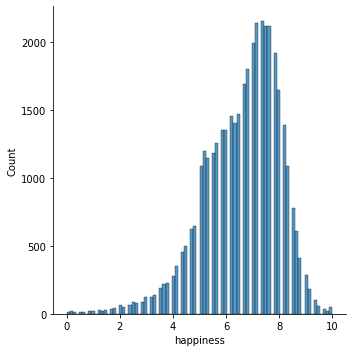

In [ ]:
sns.displot(df[target])
#negatively skewed / left-skewed

In [ ]:
#일반적으로 skewness 값이 -2 ~ +2 치우침이 없다고 판단
df[target].skew()

-0.8134991255111026

In [ ]:
#1) Linear Model 



In [ ]:
#logit 변환 하지 않음 
#1) RandomForestRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(random_state=2)
)


pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) -----??? score ? 


SyntaxError: ignored